In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
mean1=[2,4]
cov1=[[1,0.3],[0.3,1]]

d1=np.random.multivariate_normal(mean1,cov1,500)

mean2=[6,7]
cov2=[[1,0.7],[0.7,1]]

d2=np.random.multivariate_normal(mean2,cov2,500)
print(d1.shape)
print(d2.shape)


(500, 2)
(500, 2)


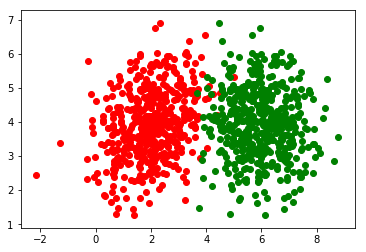

In [72]:
plt.scatter(d1[:,0],d1[:,1],c='red')
plt.scatter(d2[:,0],d1[:,1],c='green')
plt.show()

In [73]:
# red is 0 and green is 1
data=np.zeros((d1.shape[0]+d2.shape[0],d1.shape[1]+1))
data[:d1.shape[0],:-1]=d1
data[:d1.shape[0],-1]=0

data[d1.shape[0]:,:-1]=d2
data[d1.shape[0]:,-1]=1

print(data.shape)
np.random.shuffle(data)


(1000, 3)


In [74]:
print(data)

[[1.97397467 2.52799295 0.        ]
 [3.19668715 4.62359366 0.        ]
 [1.94924934 4.01243181 0.        ]
 ...
 [5.67037739 7.33199812 1.        ]
 [5.3099002  5.3534192  1.        ]
 [5.77742028 7.50888048 1.        ]]


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test=train_test_split(data[:,:-1],data[:,-1],test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


In [77]:
class LogisticRegression:
    def __init__(self,X,y):
        self.X=X
        self.y=y
        self.w0=np.random.random()
        self.w=np.random.uniform(low=-1,high=1,size=(self.X.shape[1],))
    def hypothesis(self,x):
        z=self.w0+self.w.dot(x)
        return self.sigmoid(z)
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def predict(self,x):
        hx=self.hypothesis(x)
        if hx>=0.5:
            return 1
        else:
            return 0
    def compute_loss(self):
        log_loss=0
        for x,y in zip(self.X,self.y):
            yhat=self.hypothesis(x)
            log_loss=log_loss+(y*np.log2(yhat+1e-3)+(1-y)*np.log2(1-yhat+1e-3))
        negative_log_likelihood=-1*log_loss
        return negative_log_likelihood
    def compute_gradients(self):
        grad0=0
        grad=np.zeros_like(self.w)
        i=0
        for x,y in zip(self.X,self.y):
            yhat=self.hypothesis(x)
            grad0=grad0+(yhat-y)
            grad=grad+((yhat-y)*x)
        gradients = grad0 , grad
        return gradients
    def update_gradients(self,gradients,learning_rate=0.01):
        self.w0=self.w0-(learning_rate*gradients[0])
        self.w=self.w-(learning_rate*gradients[1])
        
    def train(self,losses,iterations,learning_rate=0.01):
        for i in range(iterations):
            gradients=self.compute_gradients()
            self.update_gradients(gradients,learning_rate)
            losses.append(self.compute_loss())
        return losses
    def accuracy(self,x_test,y_test):
        predictions=[]
        for x,y in zip(x_test,y_test):
            pred=self.predict(x)
            predictions.append(pred)
        accuracy=(predictions==y_test).sum()/x_test.shape[0]
        return accuracy
            
            
        

In [78]:
logreg=LogisticRegression(X_train,y_train)
print("w0 : ",logreg.w0)
print("w: ",logreg.w)

w0 :  0.4387206309180244
w:  [0.03529159 0.78792228]


In [79]:
losses=[]
initial_loss=logreg.compute_loss()
losses.append(initial_loss)
print(losses)

[2092.2568825087124]


In [80]:
def draw_decision_boundary():
    plt.scatter(d1[:,0],d1[:,1],c='red')
    plt.scatter(d2[:,0],d1[:,1],c='green')
    x=np.array([0,6])
    y=-(logreg.w0+logreg.w[0]*x)/logreg.w[1]
    plt.plot(x,y,c='black')
    plt.show()

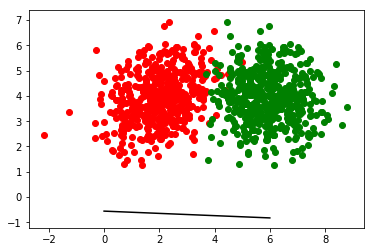

In [81]:
draw_decision_boundary()

In [82]:
logreg.train(losses,30,0.01)

[2092.2568825087124,
 3965.8024716779028,
 3995.9006870254225,
 1649.406245353392,
 3965.8024716992654,
 3995.704139137236,
 3734.7325576998196,
 3965.809544712309,
 3985.7390705737876,
 3351.925354007536,
 3862.0004236723935,
 3985.719429502238,
 3175.1724969754123,
 2092.226835758294,
 3567.0564890464834,
 672.1867668009261,
 763.2177249364994,
 735.4256177191726,
 1162.9648249252516,
 1950.2722796468581,
 1549.9110328975512,
 2860.6269020609575,
 1218.1244803599013,
 2009.0813341187559,
 1181.319516300267,
 1872.1896397753053,
 1055.92907783255,
 1549.3153174310762,
 935.6412511122917,
 1300.678958661031,
 945.4781451685196]

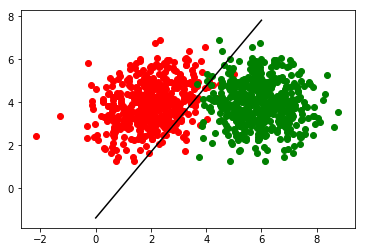

In [83]:
draw_decision_boundary()

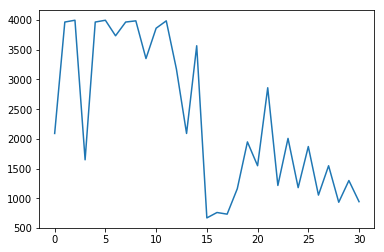

In [84]:
plt.plot(losses)
plt.show()

In [85]:
print(logreg.accuracy(X_test,y_test))

0.855


In [86]:
print("w0 : ",logreg.w0)
print("w: ",logreg.w)

w0 :  -25.894555648335135
w:  [ 28.81328402 -18.8017418 ]


# SKLearn Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
sklogreg=LogisticRegression()

In [88]:
sklogreg.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
sklogreg.score(X_test,y_test)

0.99

In [90]:
sklogreg.coef_

array([[ 2.16698225, -0.0622242 ]])

In [91]:
sklogreg.intercept_

array([-8.04311358])